## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Analysis of US Citizens by Income Levels</p>

# Aim of the Project

Applying Exploratory Data Analysis (EDA) and preparing the data to implement the Machine Learning Algorithms;
1. Analyzing the characteristics of individuals according to income groups
2. Preparing data to create a model that will predict the income levels of people according to their characteristics (So the "salary" feature is the target feature)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 32561 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import patoolib

patoolib.extract_archive("adult_eda.rar")

patool: Extracting adult_eda.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- D:\GitHub\Projects\US_Citizens_EDA\adult_eda.rar
patool:     with cwd=.\Unpack_o22u7le0
patool: ... adult_eda.rar extracted to `adult_eda1' (local file exists).


'adult_eda1'

In [3]:
df0 = pd.read_csv("adult_eda.csv", sep = ",")
df = df0.copy()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.000,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.000,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.000,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.000,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


### 1.Try to understand what the data looks like
- Check the head, shape, data-types of the features.
- Check if there are some dublicate rows or not. If there are, then drop them. 
- Check the statistical values of features.
- If needed, rename the columns' names for easy use. 
- Basically check the missing values.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.000,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.000,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
16766,35,Private,210150,HS-grad,9.000,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
16706,43,Private,145762,Bachelors,13.000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
32542,72,?,129912,HS-grad,9.000,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
3862,41,Private,121718,Assoc-voc,11.000,Married-civ-spouse,Tech-support,Husband,White,Male,0,1848,48,United-States,>50K
14644,44,Private,105862,Some-college,10.000,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,70,United-States,>50K
11985,43,Local-gov,35824,Masters,14.000,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K
14847,51,Private,165614,Masters,14.000,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,55,United-States,>50K
30755,50,Local-gov,308764,HS-grad,9.000,Widowed,Transport-moving,Unmarried,White,Female,0,0,40,United-States,<=50K
25036,65,Private,153522,HS-grad,9.000,Widowed,Other-service,Unmarried,White,Female,0,0,17,United-States,<=50K
7047,59,Self-emp-inc,107287,10th,6.000,Widowed,Exec-managerial,Unmarried,White,Female,0,2559,50,United-States,>50K


In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [8]:
df.duplicated().value_counts()

False    32537
True        24
dtype: int64

In [9]:
df.drop_duplicates(keep="first", inplace=True)

In [10]:
df.shape

(32537, 15)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
education-num,31735.000,10.084,2.575,1.000,9.000,10.000,12.000,16.000
capital-gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital-loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours-per-week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000


**Rename the features of;**<br>
**``"education-num"``**, **``"marital-status"``**, **``"capital-gain"``**, **``"capital-loss"``**, **``"hours-per-week"``**, **``"native-country"``** **as**<br>
**``"education_num"``**, **``"marital_status"``**, **``"capital_gain"``**, **``"capital_loss"``**, **``"hours_per_week"``**, **``"native_country"``**, **respectively and permanently.**

In [12]:
df.rename(columns={"education-num" : "education_num",
                   "marital-status" : "marital_status",
                   "capital-gain" : "capital_gain",
                   "capital-loss": "capital_loss",
                   "hours-per-week" : "hours_per_week",
                   "native-country" : "native_country",
                   "sex" : "gender"},
          inplace = True)

In [13]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education_num      802
marital_status       0
occupation           0
relationship      5064
race                 0
gender               0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
salary               0
dtype: int64

In [14]:
df.isnull().sum() / df.shape[0]*100

age               0.000
workclass         0.000
fnlwgt            0.000
education         0.000
education_num     2.465
marital_status    0.000
occupation        0.000
relationship     15.564
race              0.000
gender            0.000
capital_gain      0.000
capital_loss      0.000
hours_per_week    0.000
native_country    0.000
salary            0.000
dtype: float64

In [15]:
print('Missing Value Information Per Column:\n')
missing_count = df.isnull().sum()
missing_per = df.isnull().sum()/df.shape[0]*100

missing_df = pd.concat({"missing_count": missing_count, "missing_percentage": missing_per}, axis=1)
missing_df

Missing Value Information Per Column:



,missing_count,missing_percentage
age,0,0.000
workclass,0,0.000
fnlwgt,0,0.000
education,0,0.000
education_num,802,2.465
marital_status,0,0.000
occupation,0,0.000
relationship,5064,15.564
race,0,0.000
gender,0,0.000


In [16]:
def show_nulls(data):
    
    '''
    
    This function plots missing values for each column by observation in the dataset.
    
    ''' 
    plt.figure(figsize=(10, 5))

    sns.displot(data=data.isnull().melt(value_name="missing"),
                y="variable",
                hue="missing",
                multiple="fill",
                height=9.25)

    plt.axvline(0.2, color="r")
    plt.show()

<Figure size 1000x500 with 0 Axes>

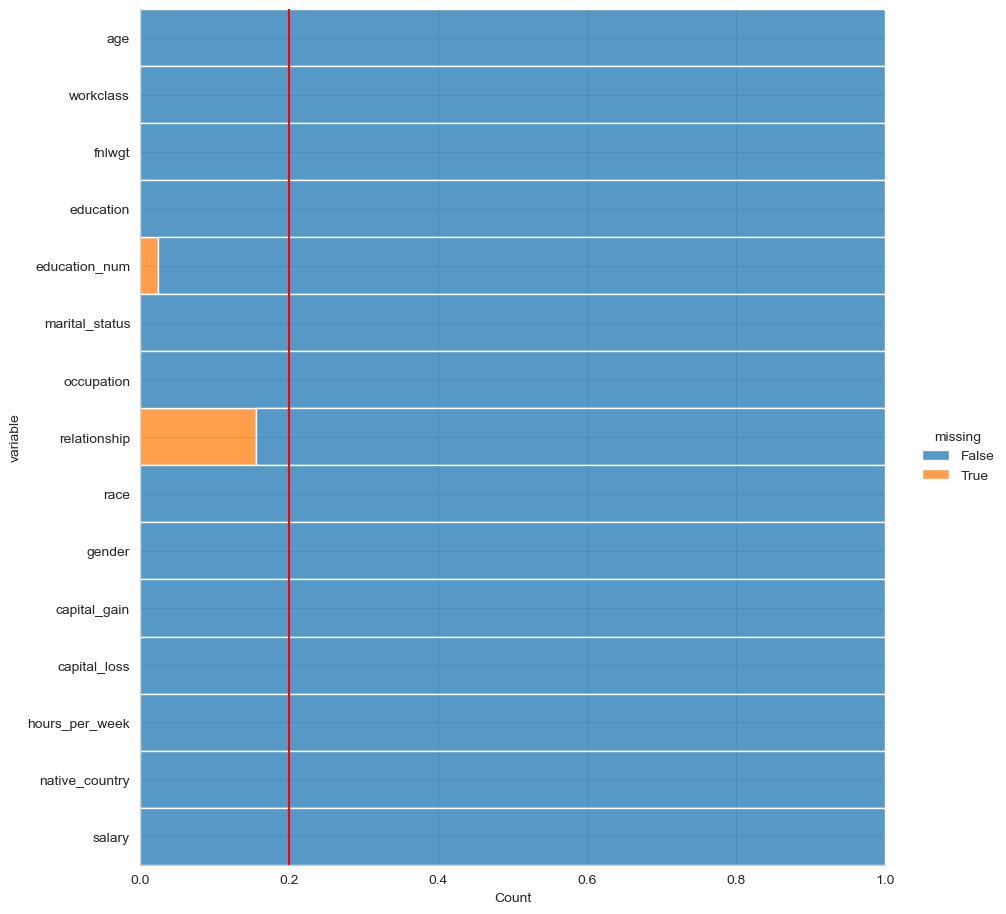

In [17]:
show_nulls(df)

### 2.Look at the value counts of columns that have object datatype and detect strange values apart from the NaN Values

In [18]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [19]:
print('Descriptive Statistics of Categorical Features:\n', )

df.describe(include="object").T

Descriptive Statistics of Categorical Features:



,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,27473,5,Husband,13187
race,32537,5,White,27795
gender,32537,2,Male,21775
native_country,32537,42,United-States,29153
salary,32537,2,<=50K,24698


**Assign the Columns (Features) of object data type as** **``"object_col"``**

In [20]:
object_col = df.select_dtypes(include='O').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [21]:
for col in object_col:
    print(col)
    print("--"*8)
    print(df[col].value_counts(dropna=False))
    print("--"*20)

workclass
----------------
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
----------------------------------------
education
----------------
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64
----------------------------------------
marital_status
----------------
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418


**Check if the Dataset has any Question Mark** **``"?"``**

In [22]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation         True
relationship      False
race              False
gender            False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country     True
salary            False
dtype: bool

# Univariate & Multivariate Analysis

Examine all features (first target feature("salary"), then numeric ones, lastly categoric ones) separetly from different aspects according to target feature.

**to do list for numeric features:**
1. Check the boxplot to see extreme values 
2. Check the histplot/kdeplot to see distribution of feature
3. Check the statistical values
4. Check the boxplot and histplot/kdeplot by "salary" levels
5. Check the statistical values by "salary" levels
6. Write down the conclusions you draw from your analysis

**to do list for categoric features:**
1. Find the features which contains similar values, examine the similarities and analyze them together 
2. Check the count/percentage of person in each categories and visualize it with a suitable plot
3. If need, decrease the number of categories by combining similar categories
4. Check the count of person in each "salary" levels by categories and visualize it with a suitable plot
5. Check the percentage distribution of person in each "salary" levels by categories and visualize it with suitable plot
6. Check the count of person in each categories by "salary" levels and visualize it with a suitable plot
7. Check the percentage distribution of person in each categories by "salary" levels and visualize it with suitable plot
8. Write down the conclusions you draw from your analysis

**Note :** Instruction/direction for each feature is available under the corresponding feature in detail, as well.

## Salary (Target Feature)

**Check the count of person in each "salary" levels and visualize it with a countplot**

In [23]:
df["salary"].value_counts(dropna = False)

<=50K    24698
>50K      7839
Name: salary, dtype: int64

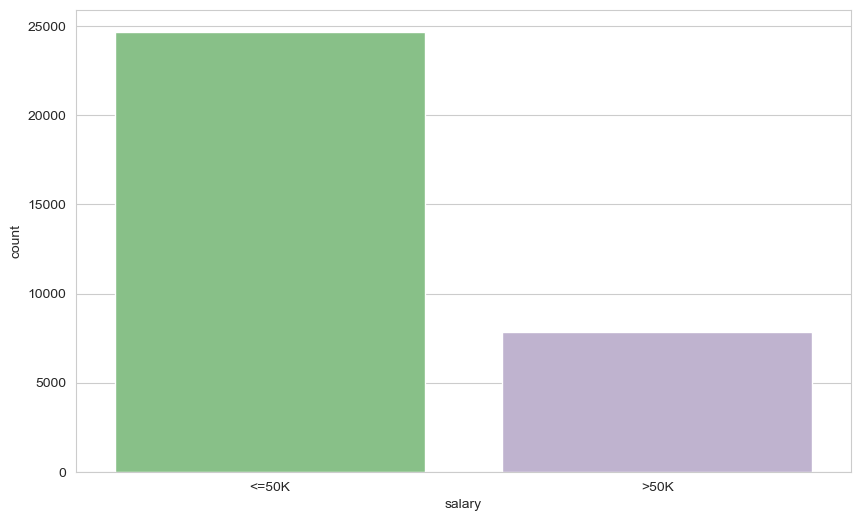

In [24]:
sns.countplot(data = df, x="salary", palette="Accent");

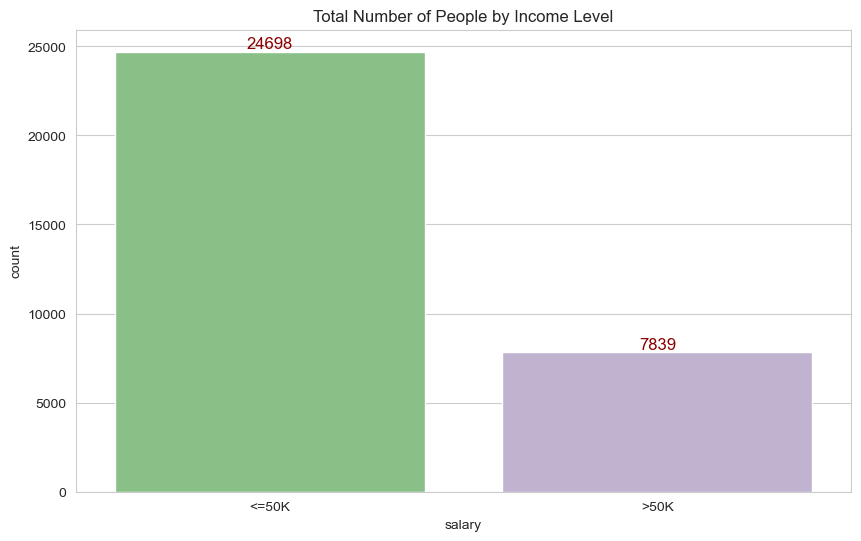

In [25]:
fig, ax = plt.subplots()

ax = sns.countplot(data = df, x = "salary", palette = "Accent")
ax.set_title("Total Number of People by Income Level", fontsize = 12)

ax.bar_label(ax.containers[0], color = "darkred", size = 12);

**Check the percentage of person in each "salary" levels and visualize it with a pieplot**

In [26]:
df.salary.value_counts(normalize = True)

<=50K   0.759
>50K    0.241
Name: salary, dtype: float64

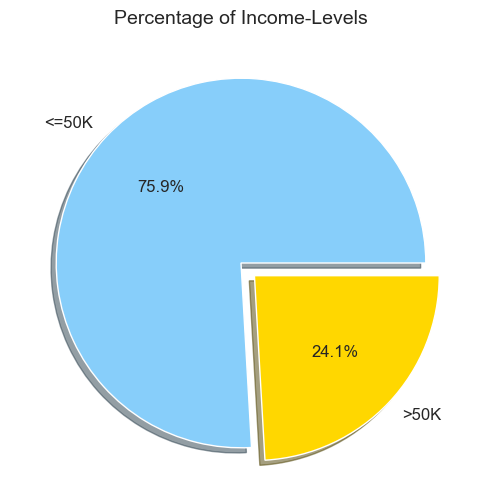

In [27]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.pie(x=df.salary.value_counts().values, 
       labels=['<=50K', '>50K'], 
       autopct='%.1f%%',
       explode=(0, 0.1),
       colors=['lightskyblue', 'gold'],
       textprops={'fontsize': 12},
       shadow=True
            )

plt.title("Percentage of Income-Levels", fontdict = {'fontsize': 14})
plt.show()

**Result :** While 75% of the individuals in the data set are at the low-income level, 25% are at the high-income level.

## Numeric Features

## age

**Check the boxplot to see extreme values**

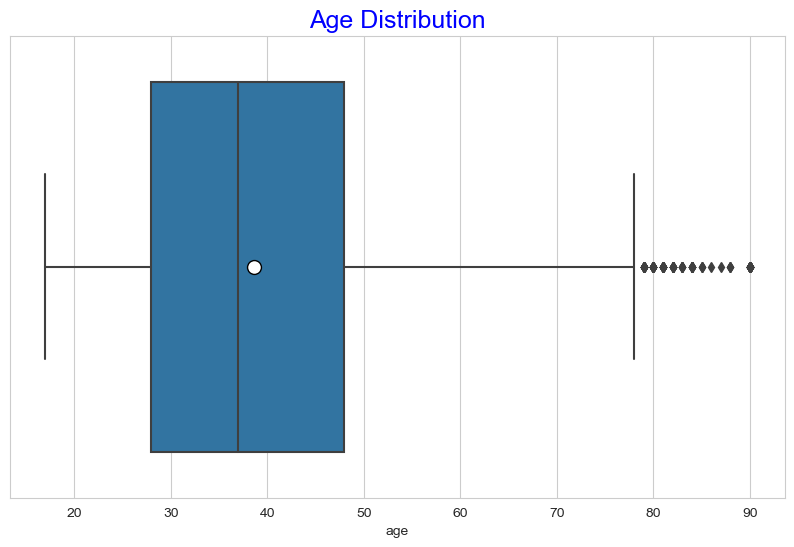

In [28]:
sns.boxplot(data=df, 
            x="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Age Distribution", fontsize=18, color="b");

**Check the histplot/kdeplot to see distribution of feature**

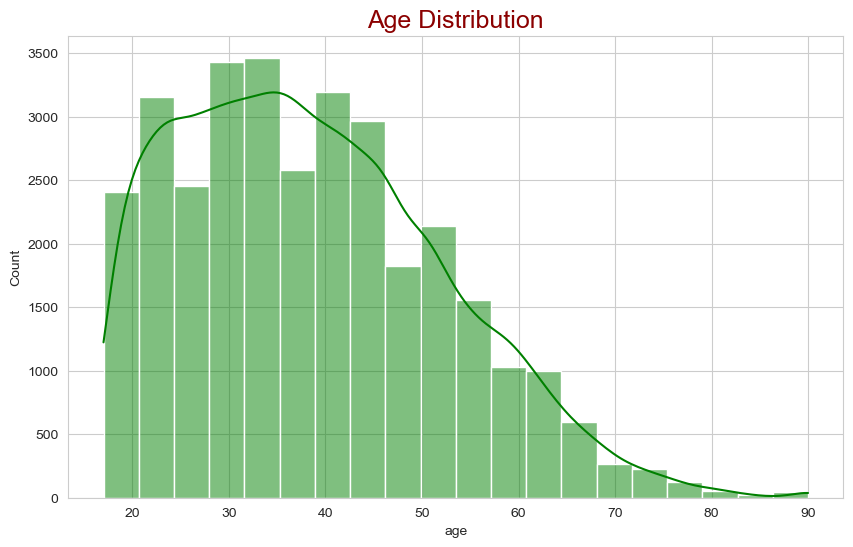

In [29]:
sns.histplot(data=df, x="age", bins=20, kde=True, color="g")

plt.title("Age Distribution", fontsize=18, color="darkred");

**Check the statistical values**

In [30]:
print(colored('Descriptive Statistics of the Age Feature:\n', 'blue', attrs=['bold']))

df.age.describe()

Descriptive Statistics of the Age Feature:



count   32537.000
mean       38.586
std        13.638
min        17.000
25%        28.000
50%        37.000
75%        48.000
max        90.000
Name: age, dtype: float64

**Check the boxplot and histplot/kdeplot by "salary" levels**

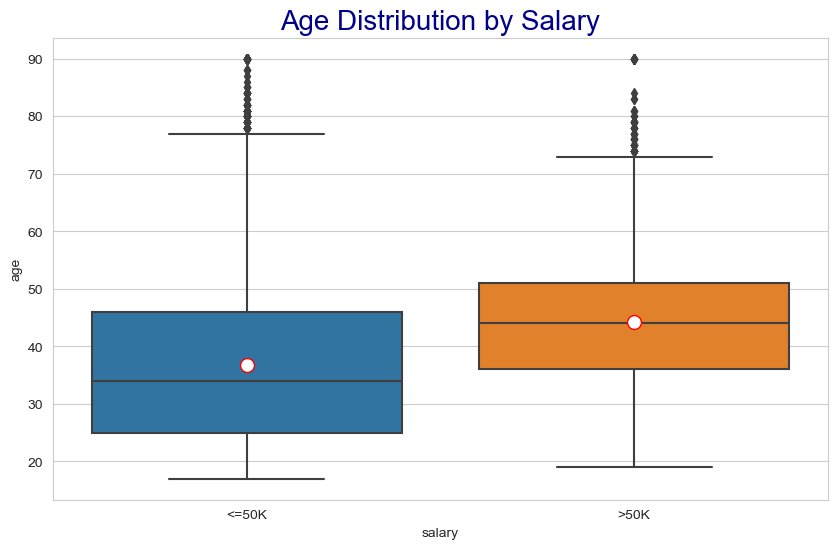

In [31]:
sns.boxplot(data=df, 
            x="salary", 
            y="age",
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"red",
                       "markersize":"10"})

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

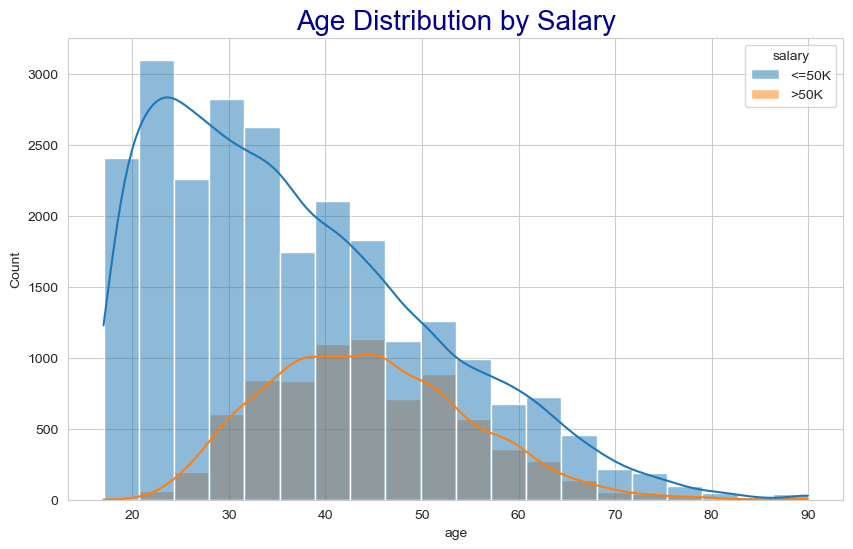

In [32]:
sns.histplot(data=df, x="age", bins= 20, kde=True, hue="salary")

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

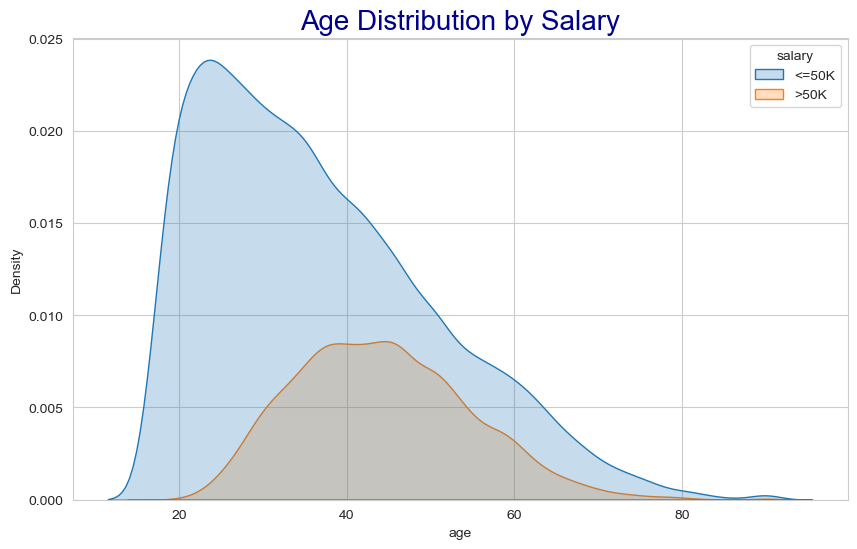

In [33]:
sns.kdeplot(data=df, x="age", hue="salary", fill=True)

plt.title("Age Distribution by Salary", fontsize=20, color="darkblue");

**Check the statistical values by "salary" levels**

In [34]:
print(colored('Descriptive Statistics of the Age by Salary:\n', 'blue', attrs=['bold']))

df.groupby("salary").age.describe()

Descriptive Statistics of the Age by Salary:



,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.000,36.787,14.017,17.000,25.000,34.000,46.000,90.000
>50K,7839.000,44.251,10.520,19.000,36.000,44.000,51.000,90.000


**Result :** The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.

 fnlwgt

In [35]:
df.head(1).T

,0
age,39
workclass,State-gov
fnlwgt,77516
education,Bachelors
education_num,13.000
marital_status,Never-married
occupation,Adm-clerical
relationship,Not-in-family
race,White
gender,Male


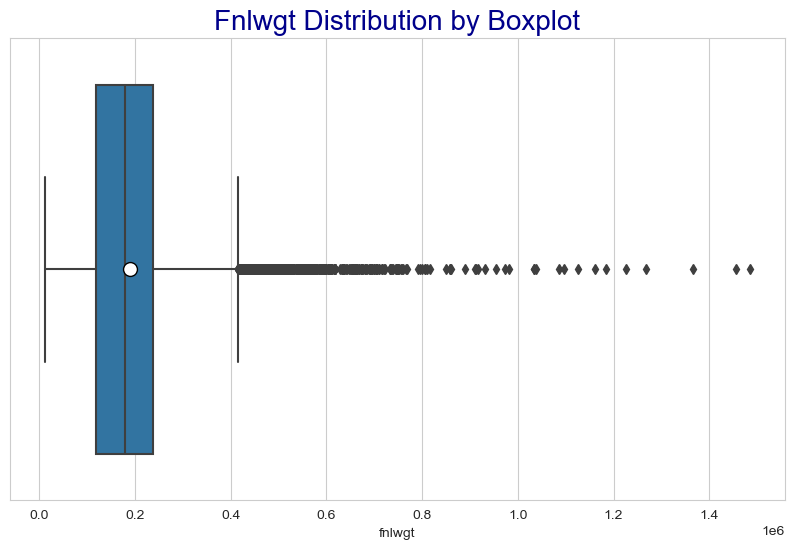

In [38]:
sns.boxplot(data = df, 
            x= "fnlwgt",
           showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})

plt.title("Fnlwgt Distribution by Boxplot", fontsize=20, color="darkblue");

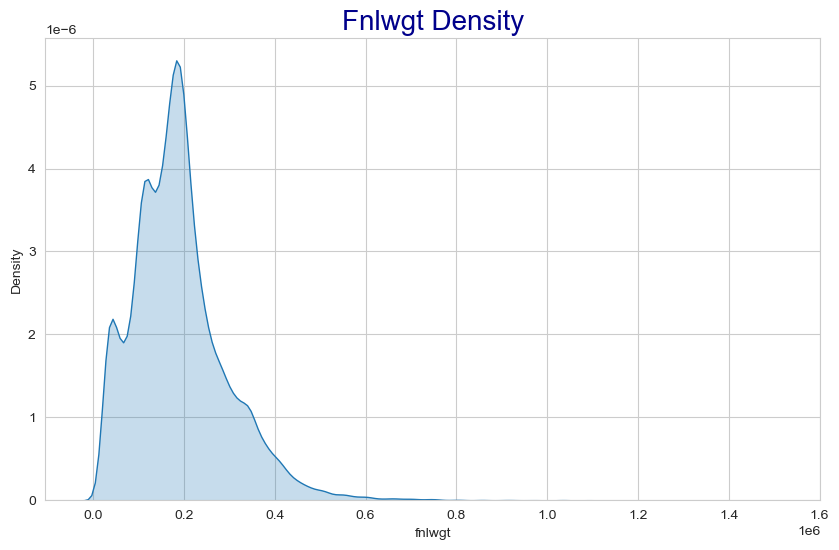

In [40]:
sns.kdeplot(data = df, x= "fnlwgt", fill=True)

plt.title("Fnlwgt Density", fontsize=20, color="darkblue");

In [43]:
print('Descriptive Statistics of the "fnlwgt" Feature:\n')

df.fnlwgt.describe()

Descriptive Statistics of the "fnlwgt" Feature:



count     32537.000
mean     189780.849
std      105556.471
min       12285.000
25%      117827.000
50%      178356.000
75%      236993.000
max     1484705.000
Name: fnlwgt, dtype: float64